# Quick check of the isaura output

run 15107 -> rebin at 2 mus


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tables as tb
from matplotlib import colors
import glob 
from pathlib import Path


from typing          import Optional
from typing          import Union
from typing          import Callable

import sys,os,os.path
sys.path.append("/gluster/data/next/software/IC_311024/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
#sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/gluster/data/next/software/IC_311024/'


# steal some functions
sys.path.append('/gluster/data/next/notebooks/john_books/fom_fitting')
import functions as func


from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

from IC.invisible_cities.io.dst_io           import load_dst, load_dsts, df_writer

from IC.invisible_cities.cities                 import beersheba as beerfun

from IC.invisible_cities.evm.event_model                          import HitCollection

from IC.invisible_cities.database.load_db       import DataSiPM

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.evm.event_model        import HitEnergy
from IC.invisible_cities.cities.beersheba          import DeconvolutionMode
from IC.invisible_cities.cities.beersheba          import CutType

from IC.invisible_cities.reco import hits_functions as hif

from IC.invisible_cities.reco.deconv_functions import deconvolve
from IC.invisible_cities.reco.deconv_functions import deconvolution_input
from IC.invisible_cities.reco.deconv_functions import InterpolationMethod

import IC.invisible_cities.io.mcinfo_io as mcio

from IC.invisible_cities.cities.components import track_blob_info_creator_extractor
from IC.invisible_cities.io.hits_io        import load_hits
from IC.invisible_cities.io.hits_io        import hits_from_df
from IC.invisible_cities.core              import system_of_units as units
from IC.invisible_cities.types.symbols     import HitEnergy
from IC.invisible_cities.evm.event_model   import HitCollection
from IC.invisible_cities.evm.event_model   import Cluster
from IC.invisible_cities.evm.event_model   import Hit
from IC.invisible_cities.types.ic_types    import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from collections import defaultdict

import matplotlib.cm as cm
from matplotlib.colors import Normalize

pd.set_option('display.max_rows', 200)

#import imageio

#import functions as func


In [2]:
def load_by_file(folder_path, file_list, group, node):
    dst = []
    for file in tqdm(file_list):
        try:
            dst.append(load_dst(folder_path + file, group, node))
        except Exception as e:
            print(f'File {file} broke with error:')
            print(e)
    
    return pd.concat(dst)


def get_h5_files(base_path):
    return sorted(str(p) for p in Path(base_path).rglob("ldc*/*.h5"))



# load in all the isaura data
folder_path = '/gluster/data/next/files/TOPOLOGY_John/N100_data/15107/isaura/'
soph_path = '/gluster/data/next/notebooks/john_books/HE_calibration/files/'

file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]

soph_files = ['15107_formatted.h5']
#soph_files = get_h5_files(soph_path)
#display(soph_files)

In [5]:


full_tracks  = load_by_file(folder_path, file_names, 'Tracking', 'Tracks')

enc = []
ec = []
for file in tqdm(file_names):
        try:
            ec.append((load_dst(folder_path + file, 'DECO', 'Events')).groupby('event').Ec.sum())
            enc.append((load_dst(folder_path + file, 'DECO', 'Events')).groupby('event').E.sum())
        except Exception as e:
            print(f'File {file} broke with error:')
            print(e)
#full_DECO  = load_by_file(folder_path, file_names, 'DECO', 'Events')
#full_RECO  = load_by_file(soph_path, soph_files, 'RECO', 'Events')

 52%|█████▏    | 86/165 [00:02<00:02, 39.13it/s]

File isaura_157.h5 broke with error:
group ``/`` does not have a child named ``Tracking``
File isaura_158.h5 broke with error:
group ``/`` does not have a child named ``Tracking``


100%|██████████| 165/165 [00:04<00:00, 33.08it/s]

File isaura_149.h5 broke with error:
group ``/`` does not have a child named ``Tracking``
File isaura_154.h5 broke with error:
group ``/`` does not have a child named ``Tracking``
File isaura_155.h5 broke with error:
group ``/`` does not have a child named ``Tracking``
File isaura_159.h5 broke with error:
group ``/`` does not have a child named ``Tracking``
File isaura_160.h5 broke with error:
group ``/`` does not have a child named ``Tracking``



100%|██████████| 165/165 [19:52<00:00,  7.22s/it]


In [6]:
print(f'TRACK STUFF')
print(f'number of events: {full_tracks.event.nunique()}')
display(full_tracks)
print(f'columns:\n{full_tracks.columns}')
print('\n\n')
print(f'DECO STUFF')
print(f'number of events: {full_DECO.event.nunique()}')
display(full_DECO)
print(f'columns:\n{full_DECO.columns}')
print('\n\n')
#print(f'RECO STUFF')
#print(f'number of events: {full_RECO.event.nunique()}')
#display(full_RECO)
#print(f'columns:\n{full_RECO.columns}')

if full_DECO.event.nunique() != full_tracks.event.nunique():

    print('====================================================')
    print("YOYO YOUR DSTS AND RECO EVENTS ARE MISALIGNED FIX THAT")
    print('====================================================')


TRACK STUFF
number of events: 23776


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,596857,0,0.385761,80.887253,133,17536,1,115.875,-413.425,1034.166000,...,1072.956662,181.786416,-409.261384,1038.546903,0.200928,0.077141,0.000000,8.777778,8.250000,8.964521
1,391568,0,0.305937,61.860587,51,7426,3,-87.125,109.575,379.325000,...,389.526640,-52.355150,167.436526,379.326730,0.230089,0.014516,0.000000,8.846154,8.600000,8.746010
2,391568,1,0.108368,21.285893,9,1994,3,346.875,74.575,289.495750,...,300.193589,367.278849,87.894822,296.271986,0.108368,0.108368,0.108368,8.846154,8.600000,8.746010
3,391568,2,0.000308,8.846154,2,66,3,-54.125,195.575,373.432250,...,373.432250,-49.100951,199.606126,373.432250,0.000308,0.000308,0.000308,8.846154,8.600000,8.746010
4,391757,0,0.233960,25.253169,20,4417,1,-334.125,126.575,537.265375,...,556.555181,-331.303339,147.361702,548.399273,0.227038,0.225099,0.218177,8.500000,8.000000,6.941281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,158976,1,0.091254,56.451742,54,4678,2,374.875,-132.425,1022.620625,...,1034.882103,377.619603,-107.074262,1033.968917,0.055030,0.025188,0.000000,8.850000,8.400000,8.433917
306,288378,0,0.377580,41.484209,50,13325,1,-308.125,-280.425,1161.873875,...,1173.145790,-303.747188,-258.880997,1181.141926,0.260863,0.220981,0.104596,8.857143,8.000000,8.941031
307,288574,0,0.693092,210.026083,322,27227,1,148.875,288.575,441.972875,...,447.990597,222.566155,377.450972,566.575344,0.291982,0.060794,0.000000,8.500000,8.416667,8.681912
308,939770,0,1.044399,153.109127,445,53129,1,-52.125,-108.425,569.103750,...,696.716656,19.949160,-99.752409,581.603023,0.220475,0.175616,0.000000,8.454545,8.812500,8.913450


columns:
Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z'],
      dtype='object')



DECO STUFF


NameError: name 'full_DECO' is not defined

# Things we want to show
- number of tracks per energy histogram
- efficiency of cuts and cuts
- energy distribution in cuts

In [38]:
#ec_list = [x.to_numpy() for x in ec]
print(np.concatenate(ec_list).ravel())

[0.24641401 2.56314815 0.32018946 ... 1.0213274  0.24707685 0.45945741]


### energy distribution per event

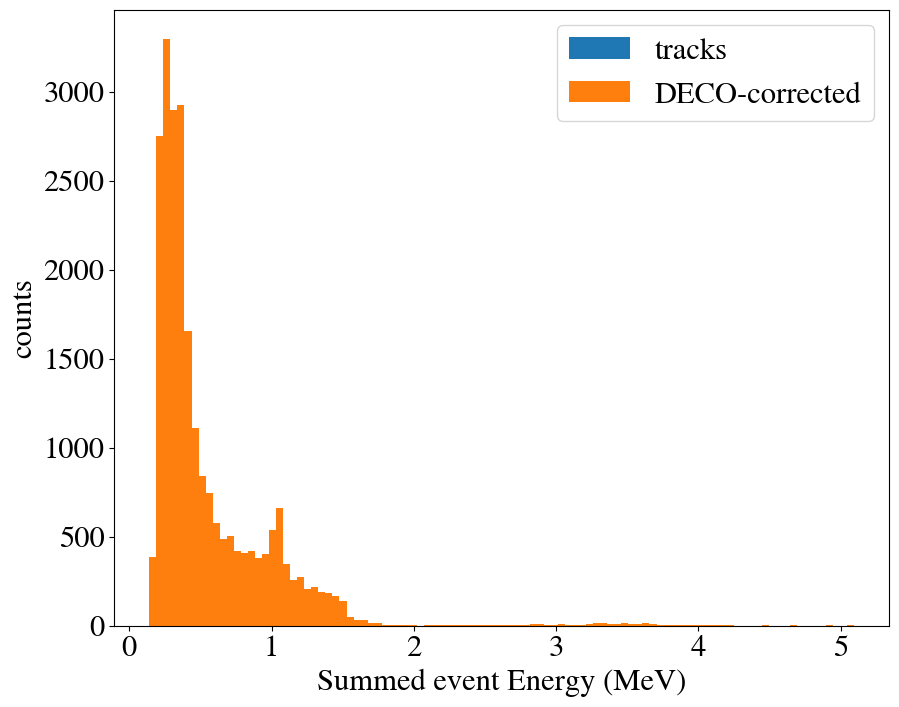

In [41]:
plt.hist(full_tracks.groupby('event').energy.sum(), bins = 100, label = 'tracks')
plt.hist(np.concatenate(ec_list).ravel(), bins = 100, label = 'DECO-corrected')
#plt.hist(enc, bins = 100, label = 'DECO')
#plt.hist(full_RECO.groupby('event').energy.sum(), bins = 100, label = 'RECO')
plt.legend()
plt.xlabel('Summed event Energy (MeV)')
plt.ylabel('counts')
plt.show()

Looks like it took the uncorrected energy, how?

In [42]:
r = pd.read_hdf('files/15107_passing.h5', key = 'RECO/Events')

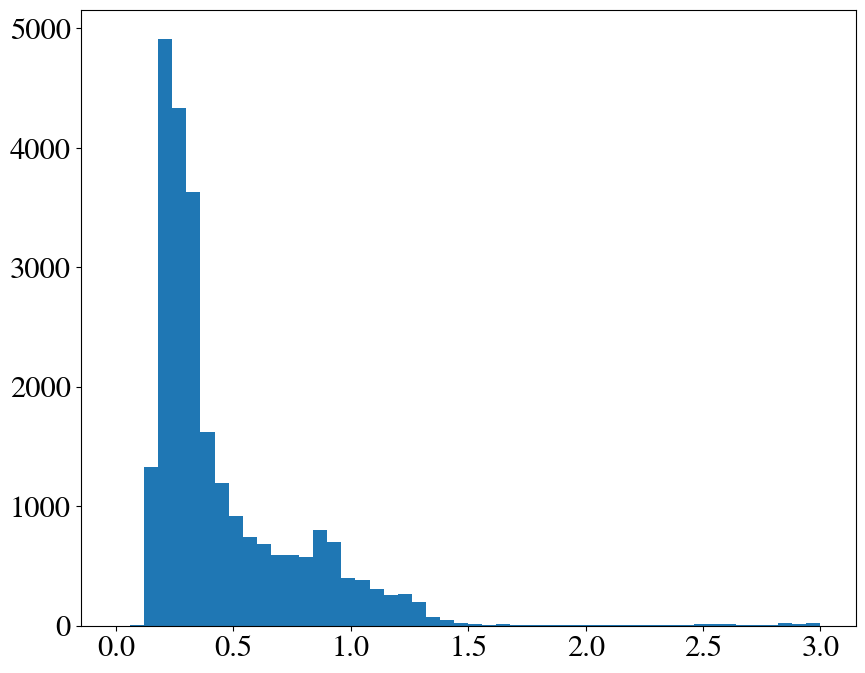

In [45]:
plt.hist(r.groupby('event').Ec.sum(), bins = 50, range = [0,3])
plt.show()

# annoyingly a very similar vibe...why did it run beersheba with the uncorrected energy?

In [46]:
# check the input
r = pd.read_hdf('files/15107_formatted.h5', key = 'RECO/Events')

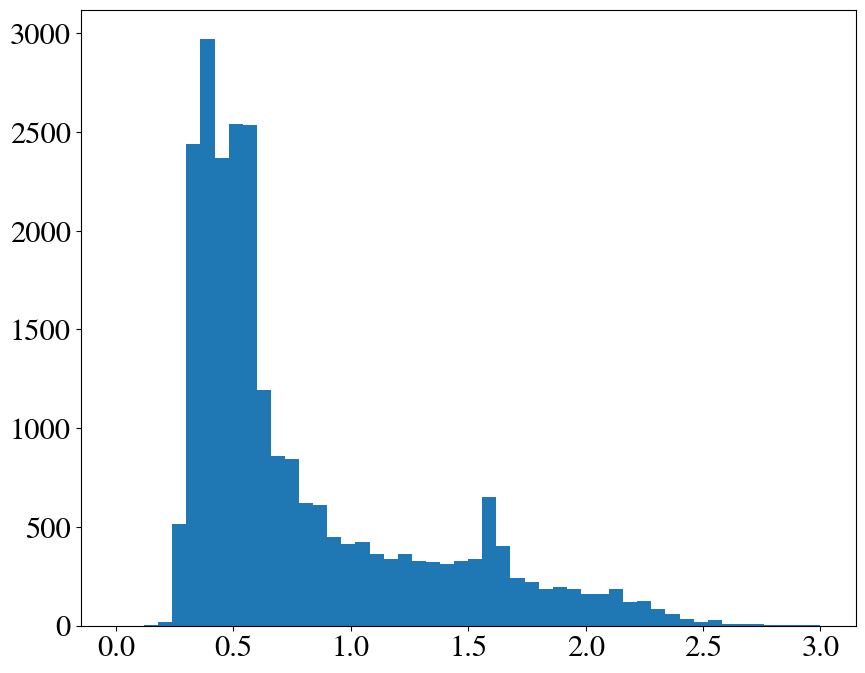

In [47]:
plt.hist(r.groupby('event').Ec.sum(), bins = 50, range = [0,3])
plt.show()

### number of tracks per energy histogram

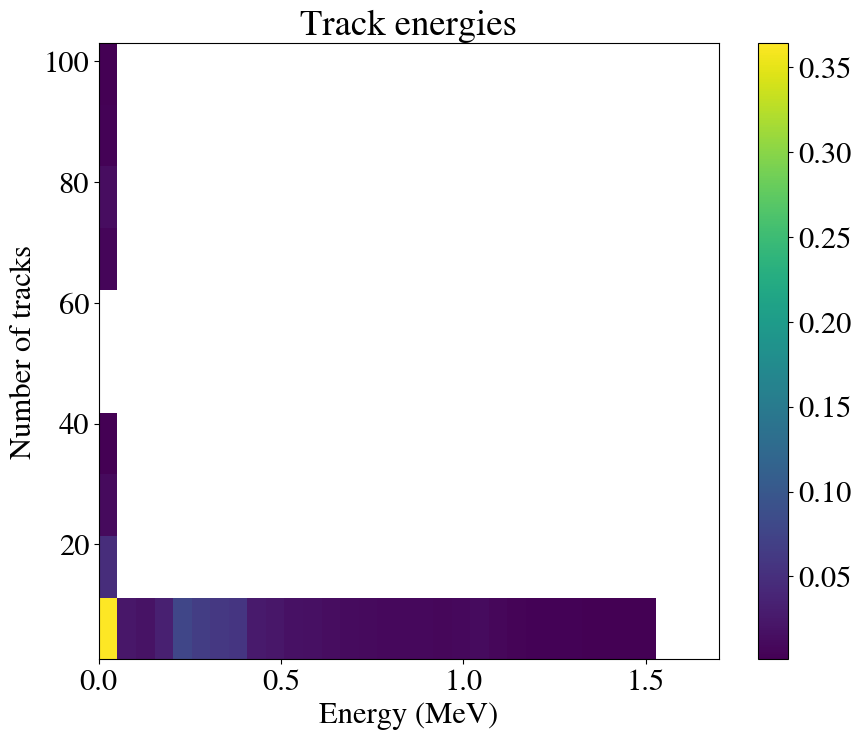

In [ ]:
# useful to normalize histograms
def get_weights(data, norm):
    if norm:
        return np.repeat(1.0/len(data), len(data))
    else:
        return np.repeat(1.0, len(data))



track_energy = full_tracks.energy
track_no = full_tracks.numb_of_tracks
# normalise
weights = get_weights(track_energy, True)
#plt.hist2d(track_energy, track_no, bins=(50, 20), cmin=0.001)
plt.hist2d(track_energy, track_no, weights = weights, bins=(100, 10), cmin=0.001)
plt.title("Track energies")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of tracks')
plt.xlim([0, 1.7])
plt.colorbar()
plt.show()

### Apply cuts

In [51]:
# satellite removal
#low_e_cut_tracks = full_tracks[full_tracks.energy > 0.05]
#event_counts = low_e_cut_tracks['event'].value_counts(sort = False)
#low_e_cut_tracks['numb_of_tracks'] = low_e_cut_tracks['event'].map(event_counts)

cut_tracks = func.apply_cuts(full_tracks, lower_z = 20, upper_z = 1170, r_lim = 415)

Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415

Fiducial track cut
Relative Cut efficiency:
Efficiency: 59.79 %
Absolute Cut efficiency:
Efficiency: 59.79 %

One track cut
Relative Cut efficiency:
Efficiency: 58.75 %
Absolute Cut efficiency:
Efficiency: 49.42 %

Blob overlap cut
Relative Cut efficiency:
Efficiency: 33.35 %
Absolute Cut efficiency:
Efficiency: 48.07 %

Energy cut
Relative Cut efficiency:
Efficiency: 0.18 %
Absolute Cut efficiency:
Efficiency: 0.34 %


In [54]:
display(cut_tracks[0])
display(cut_tracks[1])

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
130,654754,0,1.563983,657.182933,683,67688,1,-22.125,-306.425,573.173625,...,578.116134,182.586091,0.306389,694.068483,0.198143,0.083687,0.0,8.730769,8.861111,8.988419
93,298194,0,1.500640,454.737923,655,63346,1,-344.125,-219.425,480.600750,...,485.164067,-162.502418,-121.269259,669.527792,0.221823,0.055377,0.0,8.772727,8.611111,8.686558
42,1252492,0,1.518828,493.909804,602,62073,1,40.875,-45.425,614.311500,...,661.905108,308.039021,215.427872,626.337408,0.365287,0.048165,0.0,8.968750,8.806452,8.878841
276,78050,0,1.605066,538.999743,733,63044,1,-150.125,7.575,351.738500,...,426.096431,40.871683,297.968386,408.092704,0.065047,0.046743,0.0,8.869565,8.846154,8.702092
181,792646,0,1.554022,389.376988,732,86822,1,-176.125,-139.425,488.261250,...,519.005549,28.861852,141.703031,653.177578,0.248448,0.046135,0.0,8.720000,8.882353,8.889449


,Cut,Relative Efficiency,Relative Events,Single Cut Efficiency
0,No cuts,100.000000,23776,100.000000
1,Fiducial Cuts,59.787180,14215,59.787180
2,One track cut,58.754836,8352,49.415377
3,Blob overlap cuts,33.345307,2785,48.069482
4,Energy cuts,0.179533,5,0.340680
